In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from skimage.transform import resize
import pandas as pd
from nilearn.image import resample_img, get_data
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import minmax_scale

In [14]:
def get_maps(reference):

    if reference =="vbm_s6":
        vbm_ori = nib.load(r'vbm_maps\s6_spmT_0001.nii')
        vbm_ori = vbm_ori.get_fdata()
        vbm_ori = np.flip(vbm_ori,1)
        print(vbm_ori.shape)
        relvence = vbm_ori
    elif reference =="vbm_s8":
        vbm_ori = nib.load(r'vbm_maps\s8_spmT_0001.nii')
        vbm_ori = vbm_ori.get_fdata()
        vbm_ori = np.flip(vbm_ori,1)
        print(vbm_ori.shape)
        relvence = vbm_ori
    elif reference =="vbm_s10":
        vbm_ori = nib.load(r'vbm_maps\s10_spmT_0001.nii')
        vbm_ori = vbm_ori.get_fdata()
        vbm_ori = np.flip(vbm_ori,1)
        print(vbm_ori.shape)
        relvence = vbm_ori
    elif reference =="vbm_s12":
        vbm_ori = nib.load(r'vbm_maps\s12_spmT_0001.nii')
        vbm_ori = vbm_ori.get_fdata()
        vbm_ori = np.flip(vbm_ori,1)
        print(vbm_ori.shape)
        relvence = vbm_ori
    elif reference == "LRP":
        data = "ori"
        mod = "ALL"
        folder = "/PET_experiment/ori/model0/"
        img = nib.load(reference + folder + 'av_' + mod+ '.nii')
        relvence = img.get_fdata()
        relvence = abs(relvence)
    elif reference == "IG":
        data = "ori"
        mod = "ALL"
        folder = "/PET_experiment/"+ data +"/model0/"
        img = nib.load(reference + folder + 'av_' + mod+ '.nii')
        relvence = img.get_fdata()
        relvence = abs(relvence)
    elif reference == "GGC":
        data = "ori"
        mod = "ALL"
        folder = "/PET_experiment/"+ data +"/model0/"
        img = nib.load(reference + folder + 'av_' + mod+ '.nii')
        relvence = img.get_fdata()
        relvence = abs(relvence)
    elif reference == "LRP_s2":
        img = nib.load('LRP/PET_experiment/ori/model0/s2_av_ALL.nii')
        relvence = img.get_fdata()
        relvence = abs(relvence)
    elif reference == "LRP_s3":
        img = nib.load('LRP/PET_experiment/ori/model0/s3_av_ALL.nii')
        relvence = img.get_fdata()
        relvence = abs(relvence)
    elif reference == "LRP_s4":
        img = nib.load('LRP/PET_experiment/ori/model0/s4_av_ALL.nii')
        relvence = img.get_fdata()
        relvence = abs(relvence)
        
    elif reference == "IG_s2":
        img = nib.load('IG/PET_experiment/ori/model0/s2_av_ALL.nii')
        relvence = img.get_fdata()
        relvence = abs(relvence)
    elif reference == "IG_s3":
        img = nib.load('IG/PET_experiment/ori/model0/s3_av_ALL.nii')
        relvence = img.get_fdata()
        relvence = abs(relvence)
    elif reference == "IG_s4":
        img = nib.load('IG/PET_experiment/ori/model0/s4_av_ALL.nii')
        relvence = img.get_fdata()
        relvence = abs(relvence)
        
    elif reference == "GGC_s2":
        img = nib.load('GGC/PET_experiment/ori/model0/s2_av_ALL.nii')
        relvence = img.get_fdata()
        relvence = abs(relvence)
    elif reference == "GGC_s3":
        img = nib.load('GGC/PET_experiment/ori/model0/s3_av_ALL.nii')
        relvence = img.get_fdata()
        relvence = abs(relvence)
    elif reference == "GGC_s4":
        img = nib.load('GGC/PET_experiment/ori/model0/s4_av_ALL.nii')
        relvence = img.get_fdata()
        relvence = abs(relvence)
    elif reference == "SVM_coef":
        relvence =np.load(r'C:\Users\jieyo\Desktop\svm\SVM_coef.npy')
        relvence = np.flip(relvence,1)
        relvence = -1 * relvence
        
    elif reference == "LR_coef":
        relvence =np.load(r'C:\Users\jieyo\Desktop\svm\LR_coef.npy')
        relvence = np.flip(relvence,1)
        relvence = -1 * relvence
        
    return relvence

In [9]:
def get_maps2(reference):
    if reference == "vbm_s6":
        vbm_ori = nib.load(r'vbm_maps\s6_0_001.nii')
        vbm_ori = vbm_ori.get_fdata()
        vbm_ori = np.flip(vbm_ori,1)
        relvence = vbm_ori
    elif reference == "LRP_995":
        img = nib.load("LRP/PET_experiment/ori/model0/ALL_995.nii")
        img = img.get_fdata()
        relvence = np.flip(img,1)
    elif reference == "LRP_990":
        img = nib.load("LRP/PET_experiment/ori/model0/ALL_990.nii")
        img = img.get_fdata()
        relvence = np.flip(img,1)
 
    return relvence

In [10]:
def get_mask(reference):
    if reference =="meta":
        ale_ori6 = nib.load(r'rois/ADMCI_CMRglu_6.nii.gz')
        ale_ori6 = ale_ori6.get_fdata()
        ale_ori6 = np.squeeze(ale_ori6,3)
        print(ale_ori6.shape)
        ale_ori = ale_ori6
    elif reference =="meta_more":
        ale_ori12 = nib.load(r'rois/ADMCI_CMRglu_12.nii.gz')
        ale_ori12 = ale_ori12.get_fdata()
        ale_ori12 = np.squeeze(ale_ori12,3)
        print(ale_ori12.shape)
        ale_ori = ale_ori12
    return ale_ori

In [11]:
img = nib.load("mni_icbm152_t1_tal_nlin_asym_09c_mask.nii")
mask = img.get_fdata()

In [5]:
# ale_ori=get_mask("vbm_s6")

In [28]:
av_ALL = get_maps2("LRP_995")
ale_ori = get_mask("meta")

(193, 229, 193)


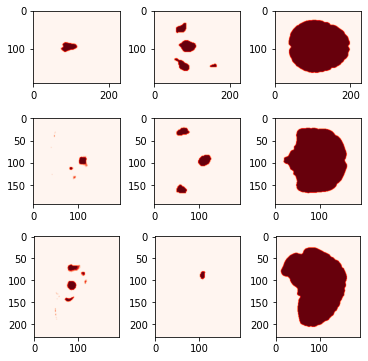

In [29]:
fig, [[ax1, ax2, ax22],[ax3, ax4, ax44],[ax5, ax6,ax66]] = plt.subplots(nrows=3, ncols=3, constrained_layout=True, figsize=(5,5))
# plt.subplots_adjust(left = 0.5)
 
i = 110
color = "Reds"

a = av_ALL[:,:,i]
b = ale_ori[:,:,i]
c = mask[:,:,i]
TP = ax1.imshow(a, cmap=color, interpolation="gaussian")
TN = ax2.imshow(b, cmap=color, interpolation="gaussian")
mk = ax22.imshow(c, cmap=color, interpolation="gaussian")
j = 100
a = av_ALL[:,j,:]
b = ale_ori[:,j,:]
c = mask[:,j,:]
TP = ax3.imshow(a, cmap=color, interpolation="gaussian")
TN = ax4.imshow(b, cmap=color, interpolation="gaussian")
mk = ax44.imshow(c, cmap=color, interpolation="gaussian")

a = av_ALL[i,:,:]
b = ale_ori[i,:,:]
c = mask[i,:,:]
TP = ax5.imshow(a, cmap=color, interpolation="gaussian")
TN = ax6.imshow(b, cmap=color, interpolation="gaussian")
mk = ax66.imshow(c, cmap=color, interpolation="gaussian")

In [63]:
mask[mask == 0] = 'nan'
rr = np.multiply(av_ALL,mask)
zz = np.multiply(ale_ori,mask)

print(f"brain: {np.count_nonzero(~np.isnan(mask))}")
print(f"relevence brain: {np.count_nonzero(~np.isnan(rr))}")
print(f"z score brain: {np.count_nonzero(~np.isnan(zz))}")

r_flat = rr.flatten() 
z_flat = zz.flatten() 
print(f"flatten size: {z_flat.shape}")
print(f"flatten size: {r_flat.shape}")

r_flat_brain = r_flat[~np.isnan(r_flat)]
z_flat_brain = z_flat[~np.isnan(z_flat)]
print(f"brain size: {z_flat_brain.shape}")
print(f"brain size: {r_flat_brain.shape}")

brain: 1886574
relevence brain: 1886574
z score brain: 1886574
flatten size: (8530021,)
flatten size: (8530021,)
brain size: (1886574,)
brain size: (1886574,)


Text(0.5, 0, 'mask')

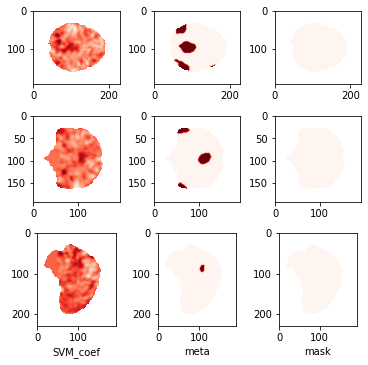

In [65]:
fig, [[ax1, ax2, ax22],[ax3, ax4, ax44],[ax5, ax6,ax66]] = plt.subplots(nrows=3, ncols=3, constrained_layout=True, figsize=(5,5))
# plt.subplots_adjust(left = 0.5)
 
i = 110
color = "Reds"

a = rr[:,:,i]
b = zz[:,:,i]
c = mask[:,:,i]
TP = ax1.imshow(a, cmap=color, interpolation="gaussian")
TN = ax2.imshow(b, cmap=color, interpolation="gaussian")
mk = ax22.imshow(c, cmap=color, interpolation="gaussian")
j = 100
a = rr[:,j,:]
b = zz[:,j,:]
c = mask[:,j,:]
TP = ax3.imshow(a, cmap=color, interpolation="gaussian")
TN = ax4.imshow(b, cmap=color, interpolation="gaussian")
mk = ax44.imshow(c, cmap=color, interpolation="gaussian")

a = rr[i,:,:]
b = zz[i,:,:]
c = mask[i,:,:]
TP = ax5.imshow(a, cmap=color, interpolation="gaussian")
TN = ax6.imshow(b, cmap=color, interpolation="gaussian")
mk = ax66.imshow(c, cmap=color, interpolation="gaussian")

ax5.set_xlabel('SVM_coef')
ax6.set_xlabel('meta')
ax66.set_xlabel('mask')

In [15]:
##############################################
############## all vs meta ###################
##############################################
all_fpr = {}
all_tpr = {}
all_roc_auc = {}

for method in [
               "LRP", "LRP_s2", "LRP_s3", "LRP_s4", \
               "IG", "IG_s2", "IG_s3", "IG_s4",\
               "GGC", "GGC_s2", "GGC_s3", "GGC_s4",\
               "SVM_coef", "LR_coef"]:

    av_ALL = get_maps(method)
    ale_ori=get_mask("meta")

    mask[mask == 0] = 'nan'
    rr = np.multiply(av_ALL,mask)
    zz = np.multiply(ale_ori,mask)

    r_flat = rr.flatten() 
    z_flat = zz.flatten() 

    r_flat_brain = r_flat[~np.isnan(r_flat)]
    z_flat_brain = z_flat[~np.isnan(z_flat)]

    z_flat_brain[z_flat_brain > 1] = 1

    fpr, tpr, _ = roc_curve(z_flat_brain,r_flat_brain)
    all_fpr[method] = fpr
    all_tpr[method] = tpr
    roc_auc1 = auc(fpr,tpr)
    all_roc_auc[method] = roc_auc1
    

(193, 229, 193)
(193, 229, 193)
(193, 229, 193)
(193, 229, 193)
(193, 229, 193)
(193, 229, 193)
(193, 229, 193)
(193, 229, 193)
(193, 229, 193)
(193, 229, 193)
(193, 229, 193)
(193, 229, 193)
(193, 229, 193)
(193, 229, 193)


C:\Users\jieyo\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


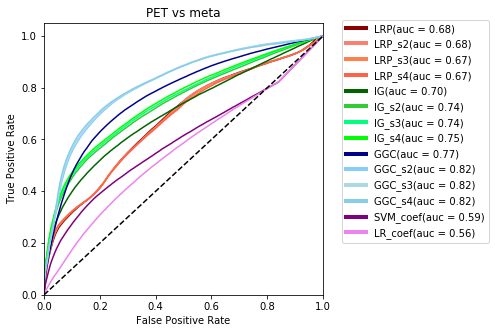

In [16]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
# ax.plot(all_fpr['vbm_s6'], all_tpr['vbm_s6'],"black", label='vbm_s6(auc = %0.2f)' % all_roc_auc['vbm_s6'])
# ax.plot(all_fpr['vbm_s8'], all_tpr['vbm_s8'],"grey",label='vbm_s8(auc = %0.2f)' % all_roc_auc['vbm_s8'])
# ax.plot(all_fpr['vbm_s10'], all_tpr['vbm_s10'],"silver", label='vbm_s10(auc = %0.2f)' % all_roc_auc['vbm_s10'])
# ax.plot(all_fpr['vbm_s12'], all_tpr['vbm_s12'], "lightgrey",label='vbm_s12(auc = %0.2f)' % all_roc_auc['vbm_s12'])

ax.plot(all_fpr['LRP'], all_tpr['LRP'],"darkred", label='LRP(auc = %0.2f)' % all_roc_auc['LRP'])
ax.plot(all_fpr['LRP_s2'], all_tpr['LRP_s2'], "salmon", label='LRP_s2(auc = %0.2f)' % all_roc_auc['LRP_s2'])
ax.plot(all_fpr['LRP_s3'], all_tpr['LRP_s3'],"coral", label='LRP_s3(auc = %0.2f)' % all_roc_auc['LRP_s3'])
ax.plot(all_fpr['LRP_s4'], all_tpr['LRP_s4'],"tomato", label='LRP_s4(auc = %0.2f)' % all_roc_auc['LRP_s4'])

ax.plot(all_fpr['IG'], all_tpr['IG'],"darkgreen", label='IG(auc = %0.2f)' % all_roc_auc['IG'])
ax.plot(all_fpr['IG_s2'], all_tpr['IG_s2'],"limegreen", label='IG_s2(auc = %0.2f)' % all_roc_auc['IG_s2'])
ax.plot(all_fpr['IG_s3'], all_tpr['IG_s3'],"springgreen", label='IG_s3(auc = %0.2f)' % all_roc_auc['IG_s3'])
ax.plot(all_fpr['IG_s4'], all_tpr['IG_s4'],"lime", label='IG_s4(auc = %0.2f)' % all_roc_auc['IG_s4'])

ax.plot(all_fpr['GGC'], all_tpr['GGC'],"darkblue", label='GGC(auc = %0.2f)' % all_roc_auc['GGC'])
ax.plot(all_fpr['GGC_s2'], all_tpr['GGC_s2'],"lightskyblue", label='GGC_s2(auc = %0.2f)' % all_roc_auc['GGC_s2'])
ax.plot(all_fpr['GGC_s3'], all_tpr['GGC_s3'],"lightblue", label='GGC_s3(auc = %0.2f)' % all_roc_auc['GGC_s3'])
ax.plot(all_fpr['GGC_s4'], all_tpr['GGC_s4'],"skyblue", label='GGC_s4(auc = %0.2f)' % all_roc_auc['GGC_s4'])

ax.plot(all_fpr['SVM_coef'], all_tpr['SVM_coef'],"purple", label='SVM_coef(auc = %0.2f)' % all_roc_auc['SVM_coef'])
ax.plot(all_fpr['LR_coef'], all_tpr['LR_coef'],"violet", label='LR_coef(auc = %0.2f)' % all_roc_auc['LR_coef'])

ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title("PET vs meta")
# ax.legend(loc="best")
leg = ax.legend( bbox_to_anchor=(1.05, 1.03))

for line in leg.get_lines():
    line.set_linewidth(4.0)

In [19]:
from platform import python_version

print(python_version())

3.7.6


In [10]:
# fig, ax = plt.subplots(1,1, figsize=(5,5))
# ax.plot(all_rec['LRP'], all_pre['LRP'],'#1f77b4',label='LRP (area = %0.2f)' % all_pr_auc['LRP'])
# ax.plot(all_rec['IG'], all_pre['IG'], 'orange',label='IG (area = %0.2f)' % all_pr_auc['IG'])
# ax.plot(all_rec['GGC'], all_pre['GGC'],'g', label='GGC (area = %0.2f)' % all_pr_auc['GGC'])
# ax.plot([1, 0], [0, 1], 'k--')
# ax.set_xlim([0.0, 1.0])
# ax.set_ylim([0.0, 1.05])
# ax.set_xlabel('Recall')
# ax.set_ylabel('Precision')
# ax.set_title((data + "_" + mod + "_" + reference))
# ax.legend(loc="upper right")

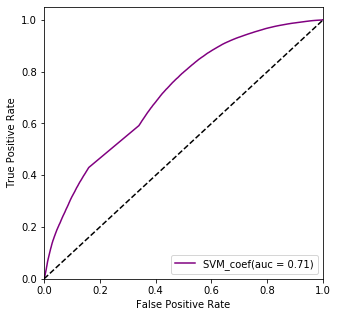

In [53]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

ax.plot(all_tpr['SVM_coef'], all_fpr['SVM_coef'], \
        "purple", label='SVM_coef(auc = %0.2f)' % (1-all_roc_auc['SVM_coef']))

ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc="lower right")